# Acceptance map that "ruins" GENIE samples to mimic the detector

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

## re-scaling of the cosmic in the overlay, and application of the cuts

In [4]:
# overlay scaling
import json
overlay_scaling = json.load(open("/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/overlay_scaling.txt"))
overlay_scaling

{u'1mu-1p': 0.03578088045074869,
 u'CC 1p 0pi': 0.03578088045074869,
 u'N(Ovelay)/N(On)': 7.667022982362373,
 u'cosmic': 0.22106943595880704,
 u'other pairs': 0.03578088045074868}

In [21]:
selected_overlay=dict()
for pair_type in pair_types[0:4]:
    selected_overlay[pair_type]=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_'+pair_type+'.csv')
selected_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
overlay = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])
print len(overlay),'events in the overlay'
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


In [9]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])
selected_CC1p0pi_tightFV['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi_tightFV['truth_Pmu_theta'])
overlay_tightFV['truth_Pmu_cos_theta'] = np.cos(overlay_tightFV['truth_Pmu_theta'])

## overlay efficiency and purity as a function of $p_p$ and $\theta_p$

In [10]:
Pp_bins = linspace(0.2,1.2,13)
Pp_theta_bins = linspace(0,np.pi,13)
xbins,ybins = Pp_bins,Pp_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pp','truth_Pp_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=[theta_rad_label(tick) for tick in ycenters]
x_label,y_label=r'$p_p$ (GeV/c)',r'$\theta_p$ [rad]'

## efficiency

In [11]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/efficiency_Pp_theta.pdf


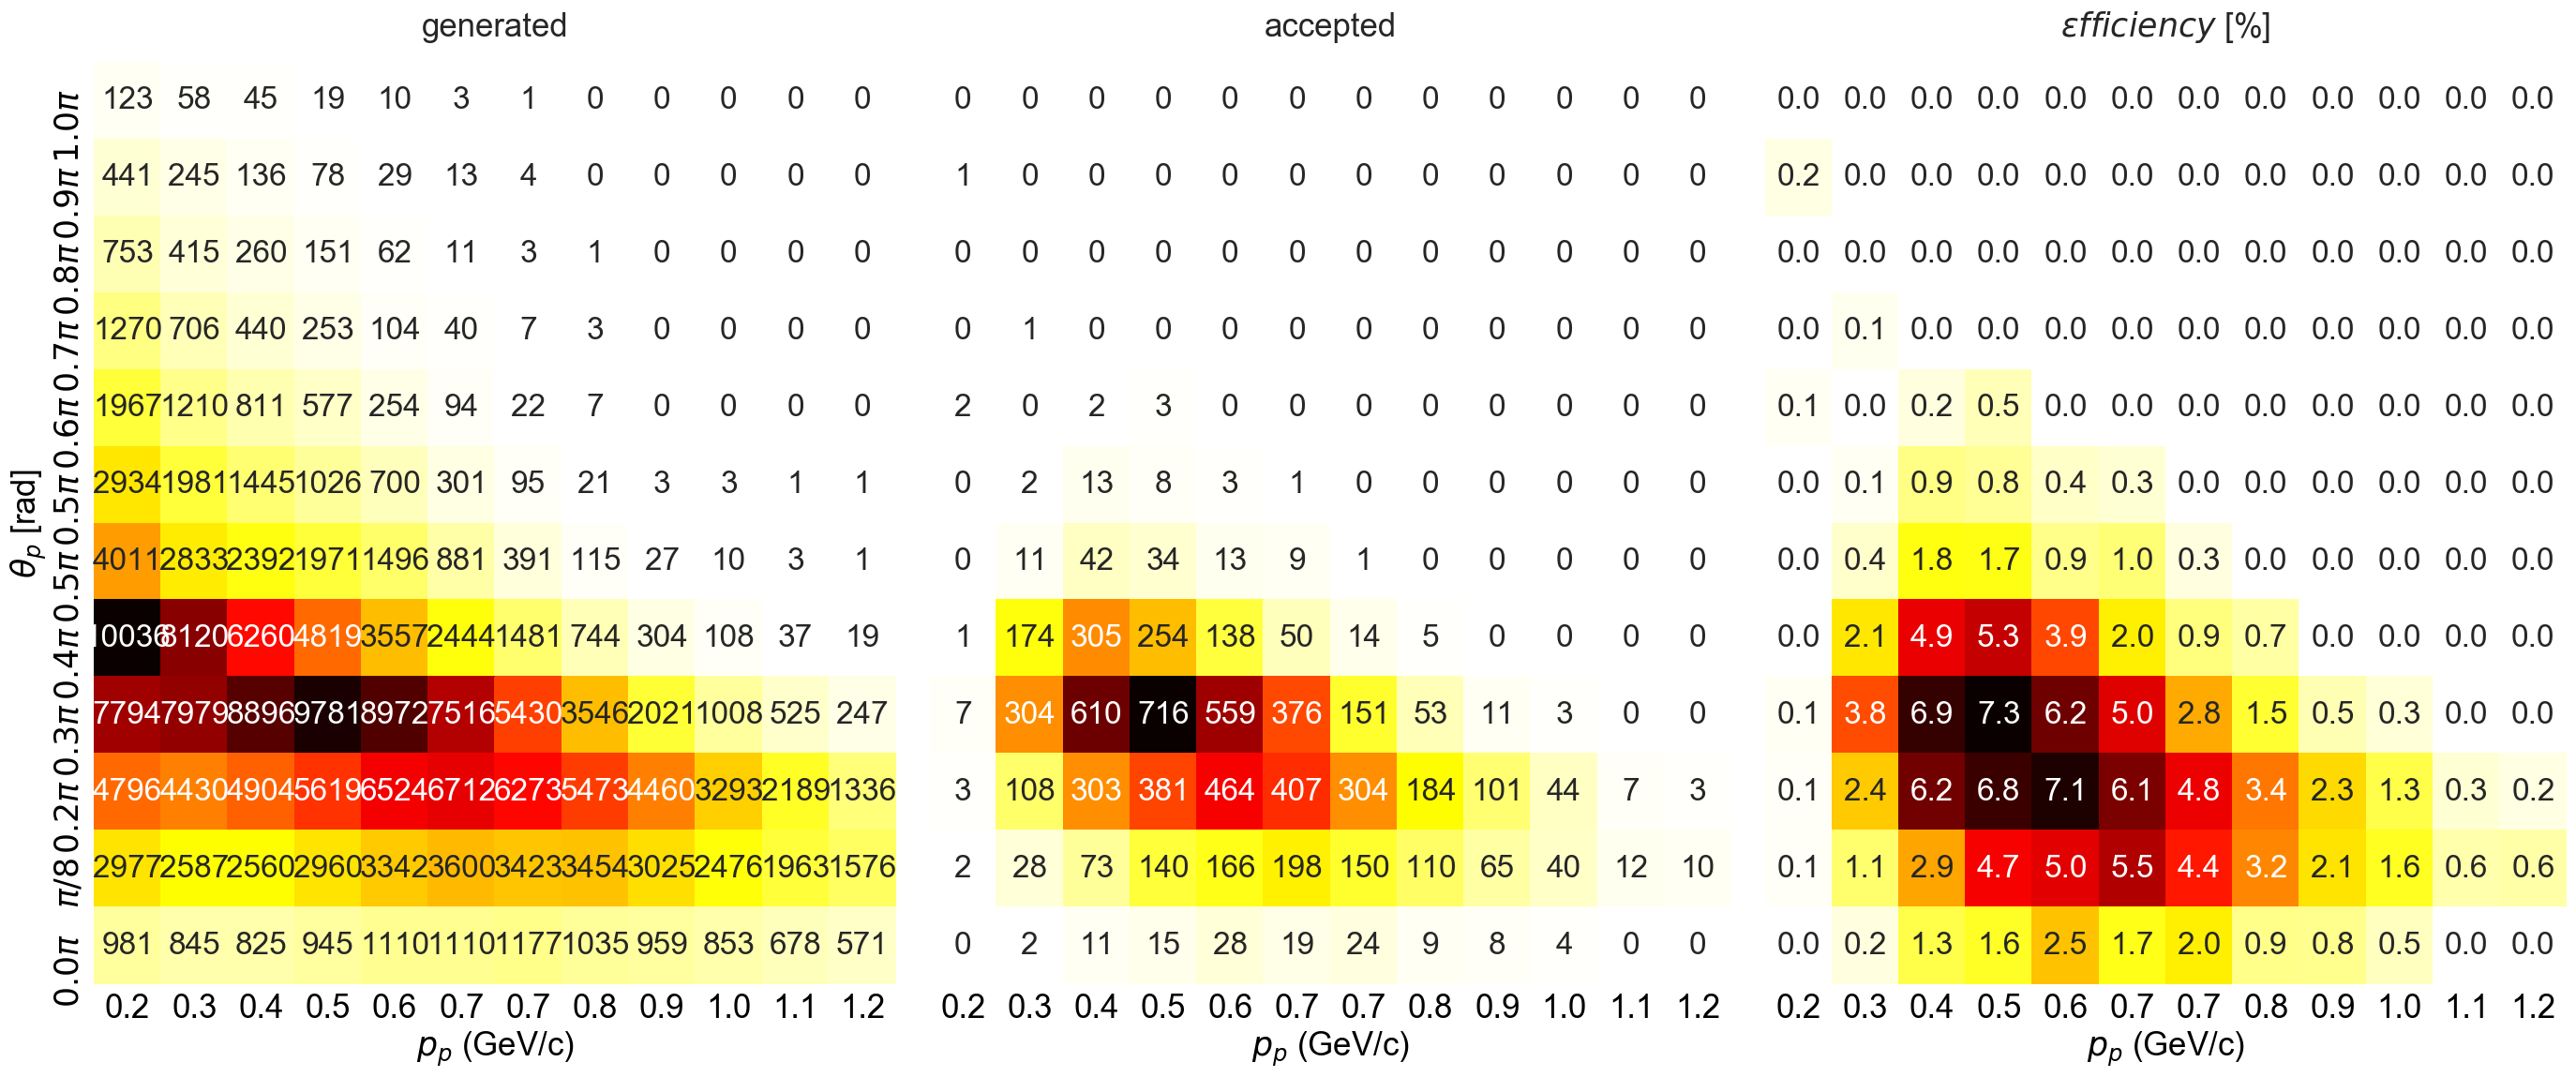

In [12]:
fig = plt.figure(figsize=(28,12))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h.astype(np.int) if i<2 else 100*h
                ,annot=True,fmt="d" if i<2 else ".1f"
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False,cmap='hot_r')
    set_axes(ax,x_label,y_label if i==0 else '',remove_ticks_y=True if i>0 else False,title=title)
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'efficiency_Pp_theta.pdf')

## purity

In [13]:
cc1p0pi = selected_CC1p0pi
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)          
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/purity_Pp_theta.pdf


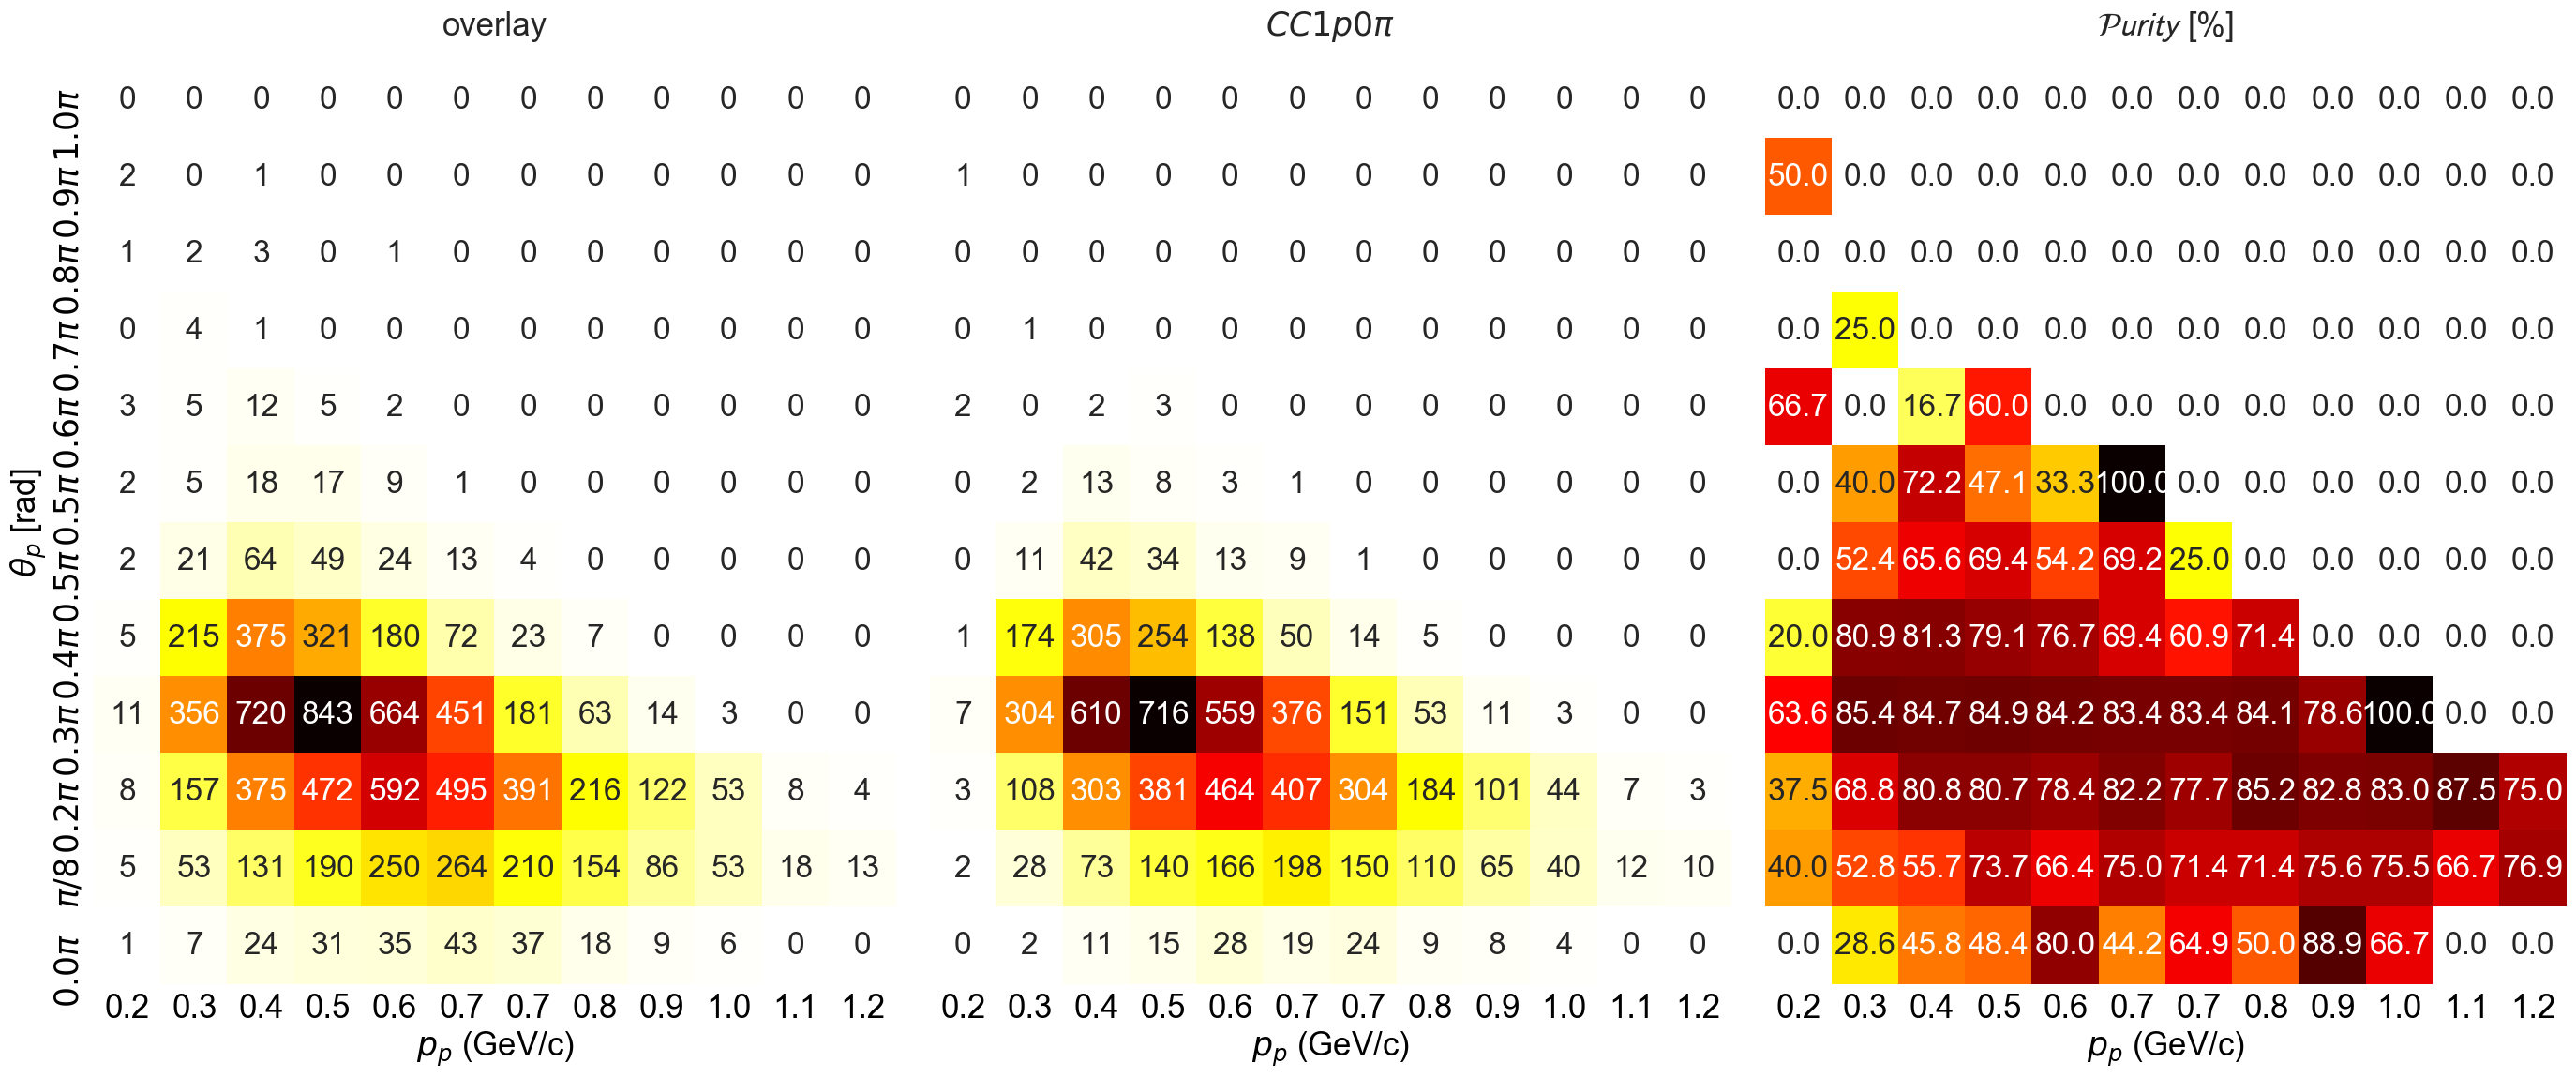

In [14]:
fig = plt.figure(figsize=(28,12))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h.astype(np.int) if i<2 else 100*h,annot=True,fmt="d" if i<2 else ".1f"
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False,cmap='hot_r')
    set_axes(ax,x_label,y_label if i==0 else '',remove_ticks_y=True if i>0 else False,title=title)
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'purity_Pp_theta.pdf')

In [15]:
hacc,herr,herr_rel = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/acceptance_full_Pp_theta.pdf


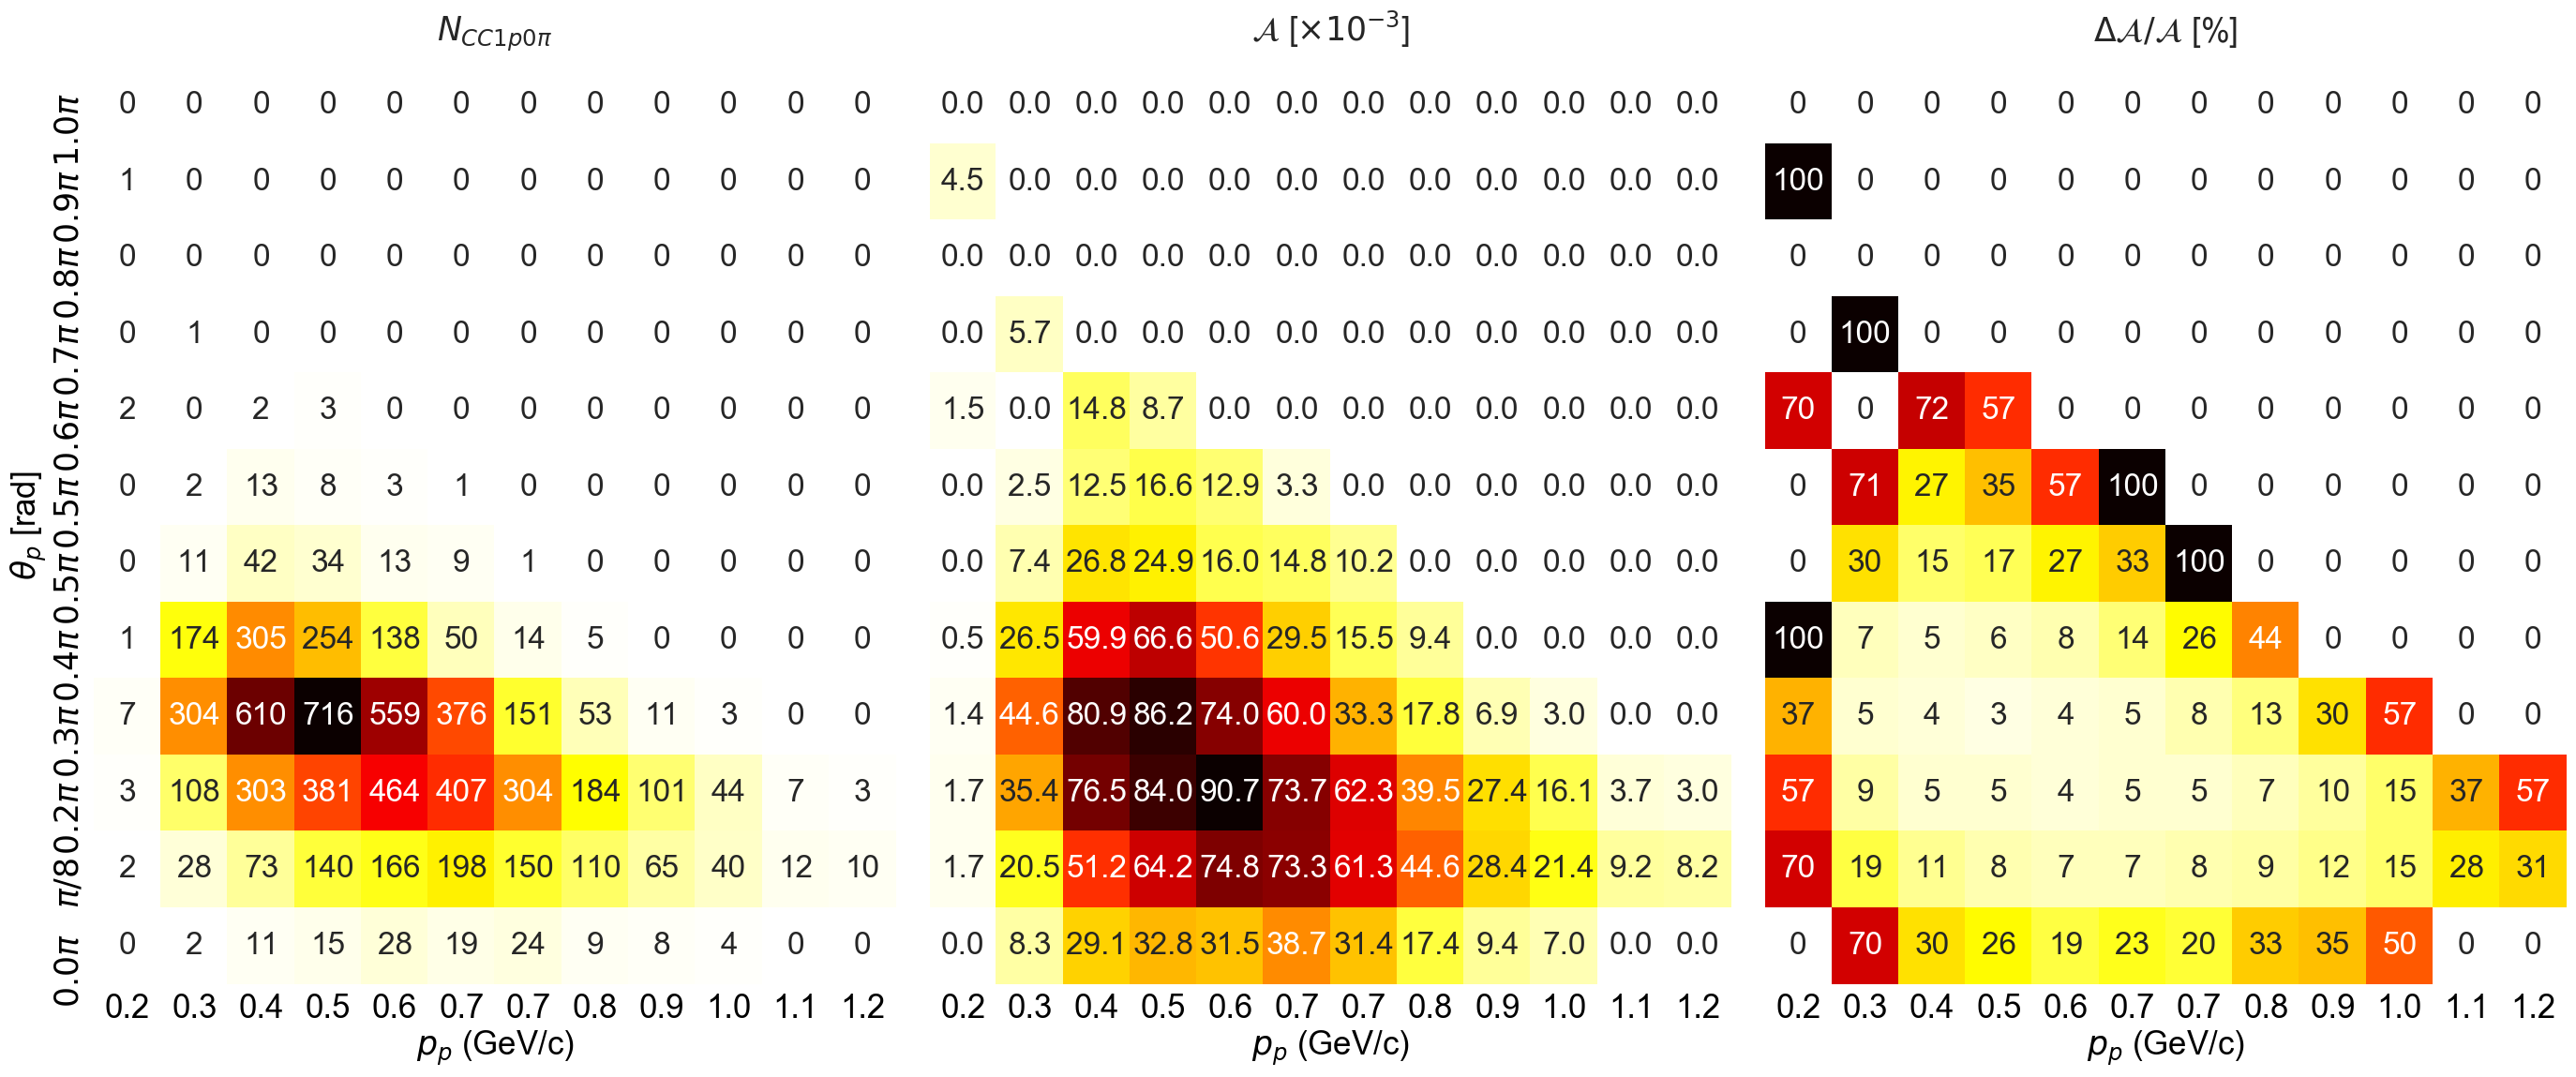

In [16]:
fig = plt.figure(figsize=(28,12))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000.*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'acceptance_full_Pp_theta.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/acceptance_Pp_theta.pdf


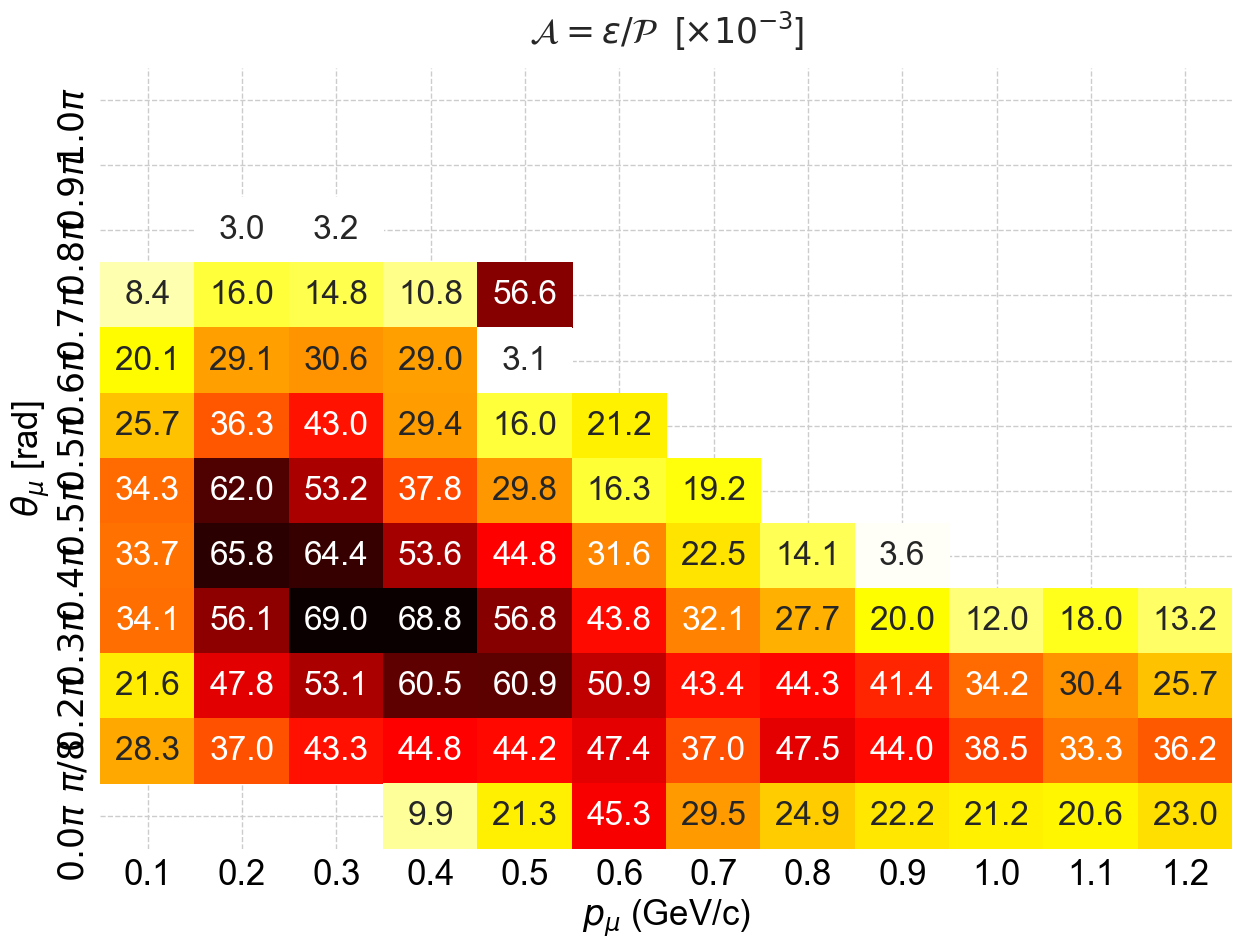

In [33]:
fig = plt.figure(figsize=(12.944,10))
ax = fig.add_subplot(1,1,1)
hacc_draw = 1000.*hacc
hacc_draw[hacc_draw <= 0] = None
sns.set_style('white')
sns.set(font_scale=2);
sns.heatmap(hacc_draw,annot=True,cmap='hot_r',fmt=".1f",vmin=None               
            ,xticklabels=xticklabels
            ,yticklabels=yticklabels
            ,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$  [$\times 10^{-3}$]',do_add_grid=True,alpha_grid=1)
ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'acceptance_Pp_theta.pdf')

## save into a csv file

In [19]:
mapname='Pp_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    #     print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_12x12_bins_xbins.csv
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_12x12_bins_ybins.csv
saved acceptance into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_12x12_bins_acceptance.csv
saved acc_err into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_12x12_bins_acc_err.csv


## overlay efficiency and purity as a function of $p_\mu$ and $\theta_\mu$

In [22]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types[0:4]:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [23]:
Pmu_bins = linspace(0.1,1.21,13)
Pmu_theta_bins = linspace(0,np.pi,13)
xbins,ybins = Pmu_bins,Pmu_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pmu','truth_Pmu_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=[theta_rad_label(tick) for tick in ycenters]
x_label,y_label=r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]'

## efficiency

In [24]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/efficiency_Pmu_theta.pdf


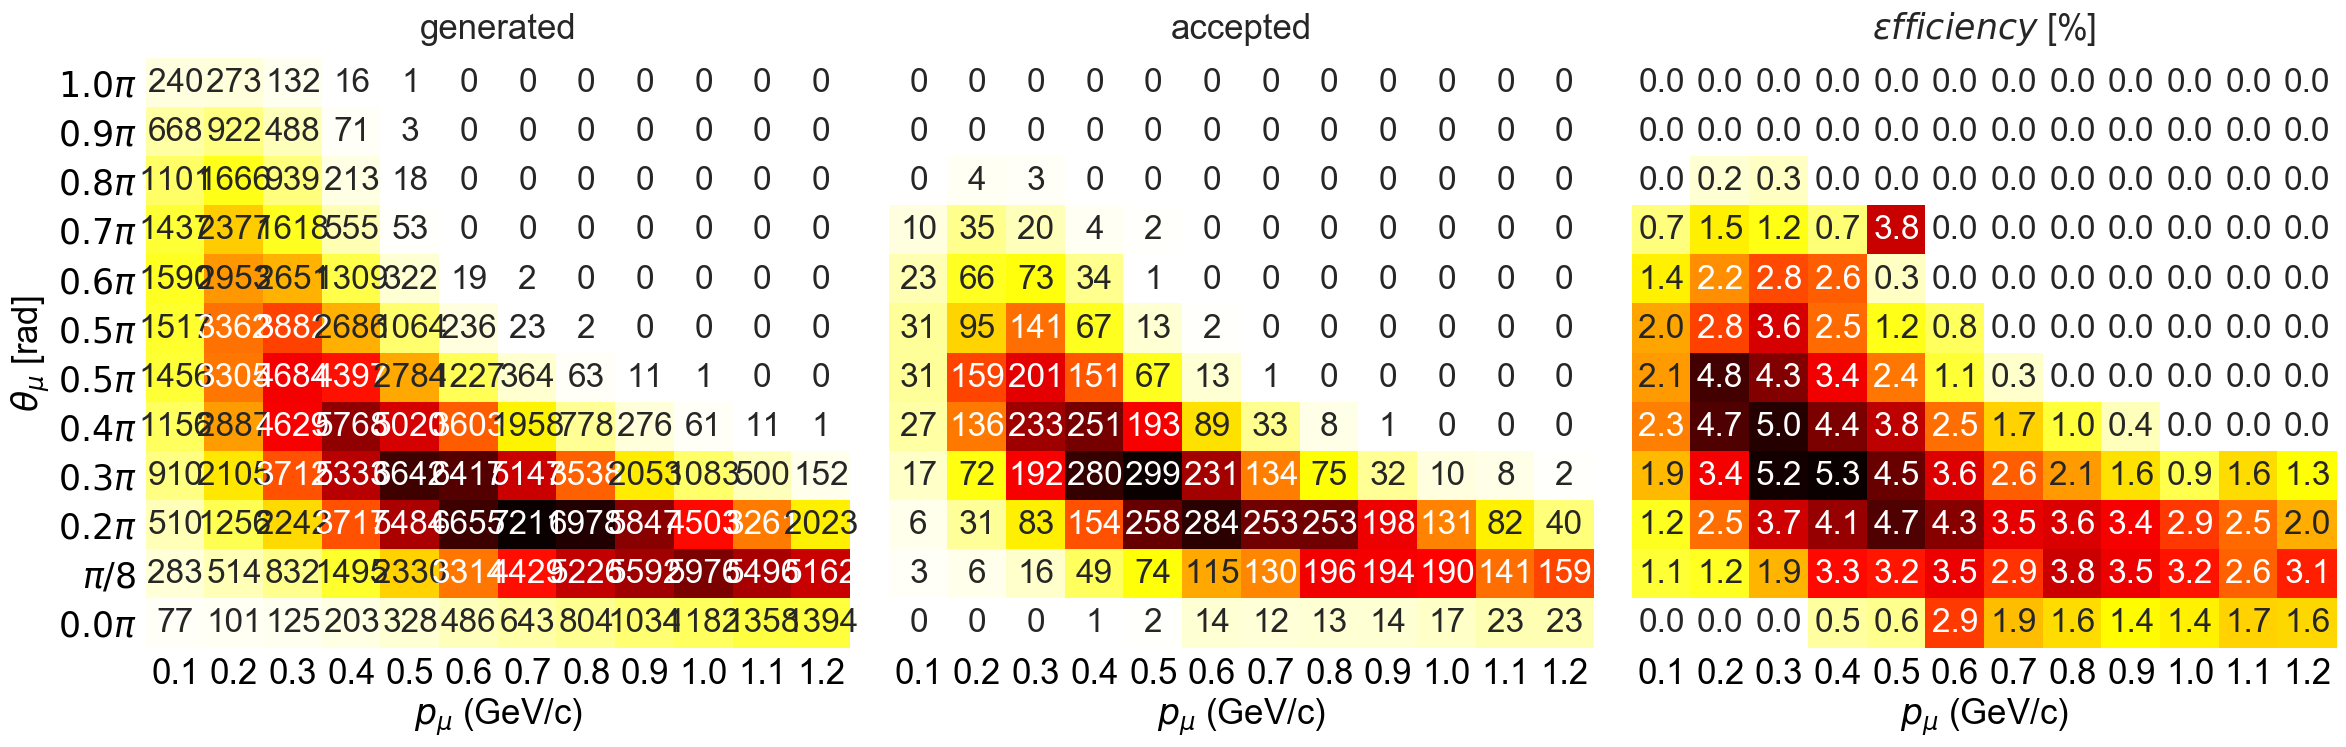

In [25]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h.astype(np.int) if i<2 else 100*h,annot=True,fmt="d" if i<2 else ".1f"
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False,cmap='hot_r')
    set_axes(ax,x_label,y_label if i==0 else '',remove_ticks_y=True if i>0 else False,title=title)
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'efficiency_Pmu_theta.pdf')

## purity

In [26]:
cc1p0pi = selected_CC1p0pi
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)  
        
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = hpur[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/purity_Pmu_theta.pdf


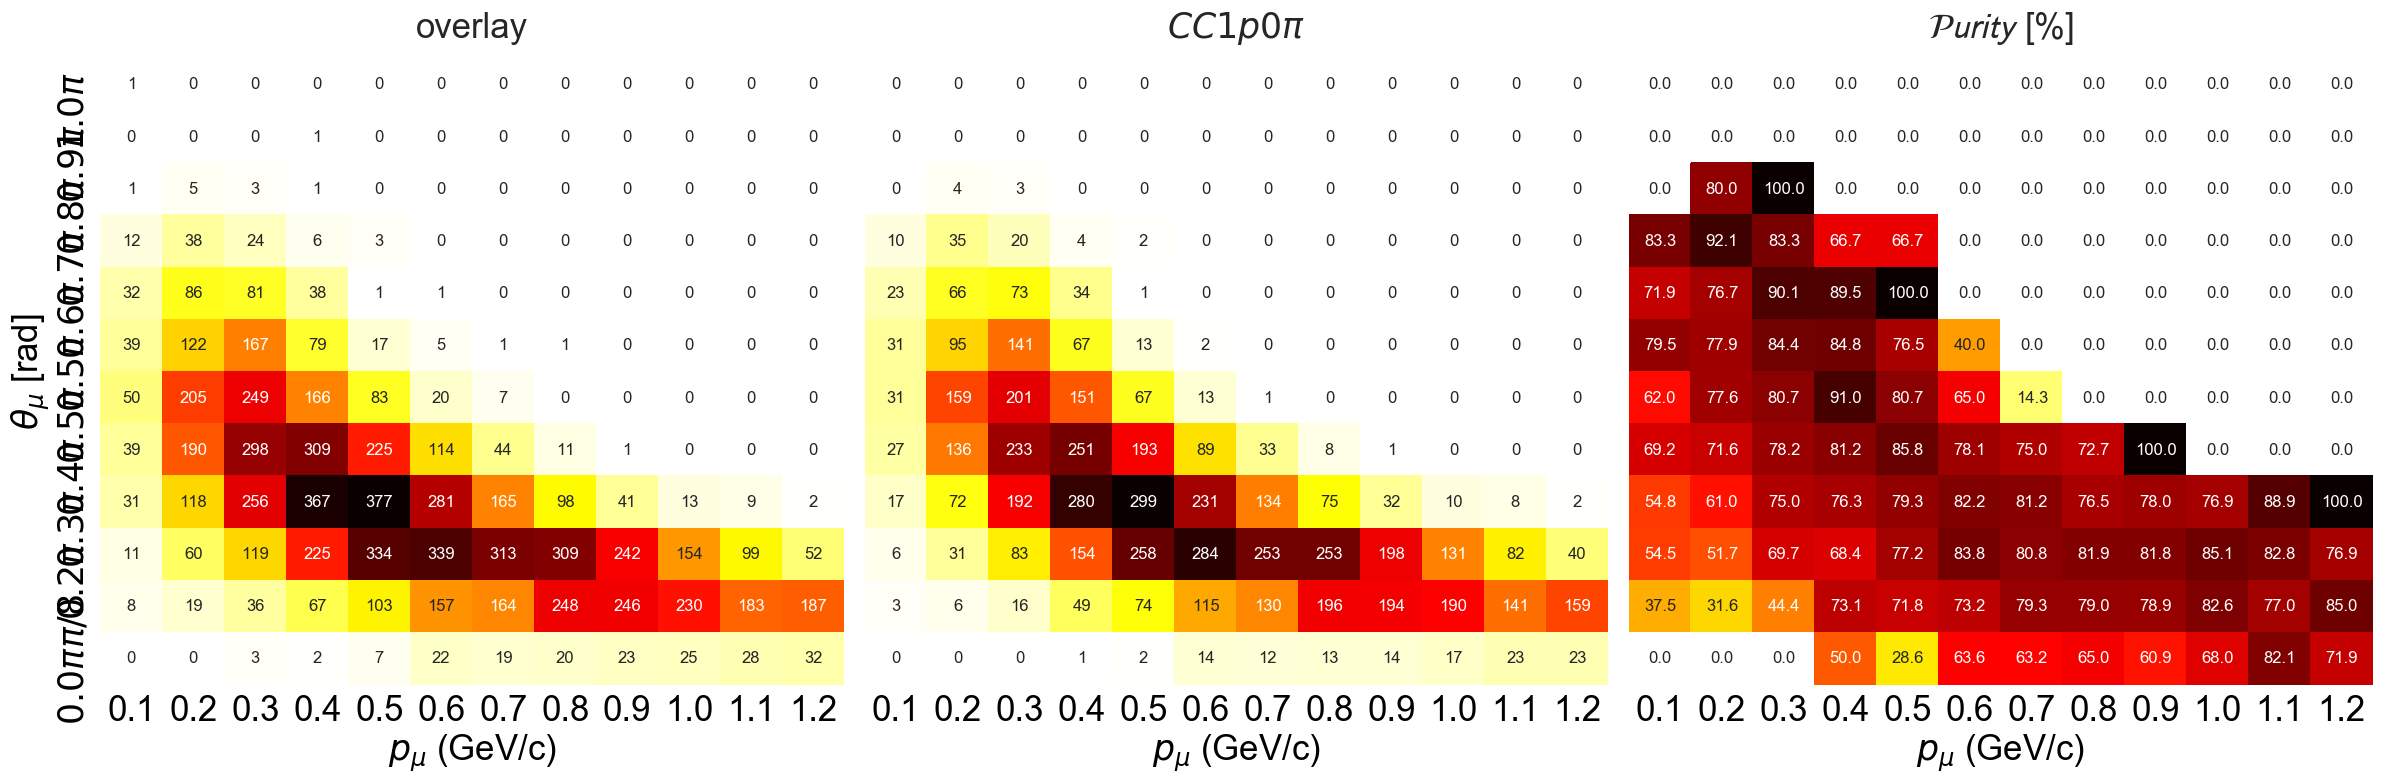

In [27]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=1);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h.astype(np.int) if i<2 else 100*h,annot=True,fmt="d" if i<2 else ".1f"
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False,cmap='hot_r')
    set_axes(ax,x_label,y_label if i==0 else '',remove_ticks_y=True if i>0 else False,title=title)
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'purity_Pmu_theta.pdf')

In [28]:
hacc = np.zeros((nx,ny))
herr = np.zeros((nx,ny))
herr_rel = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/acceptance_full_Pmu_theta.pdf


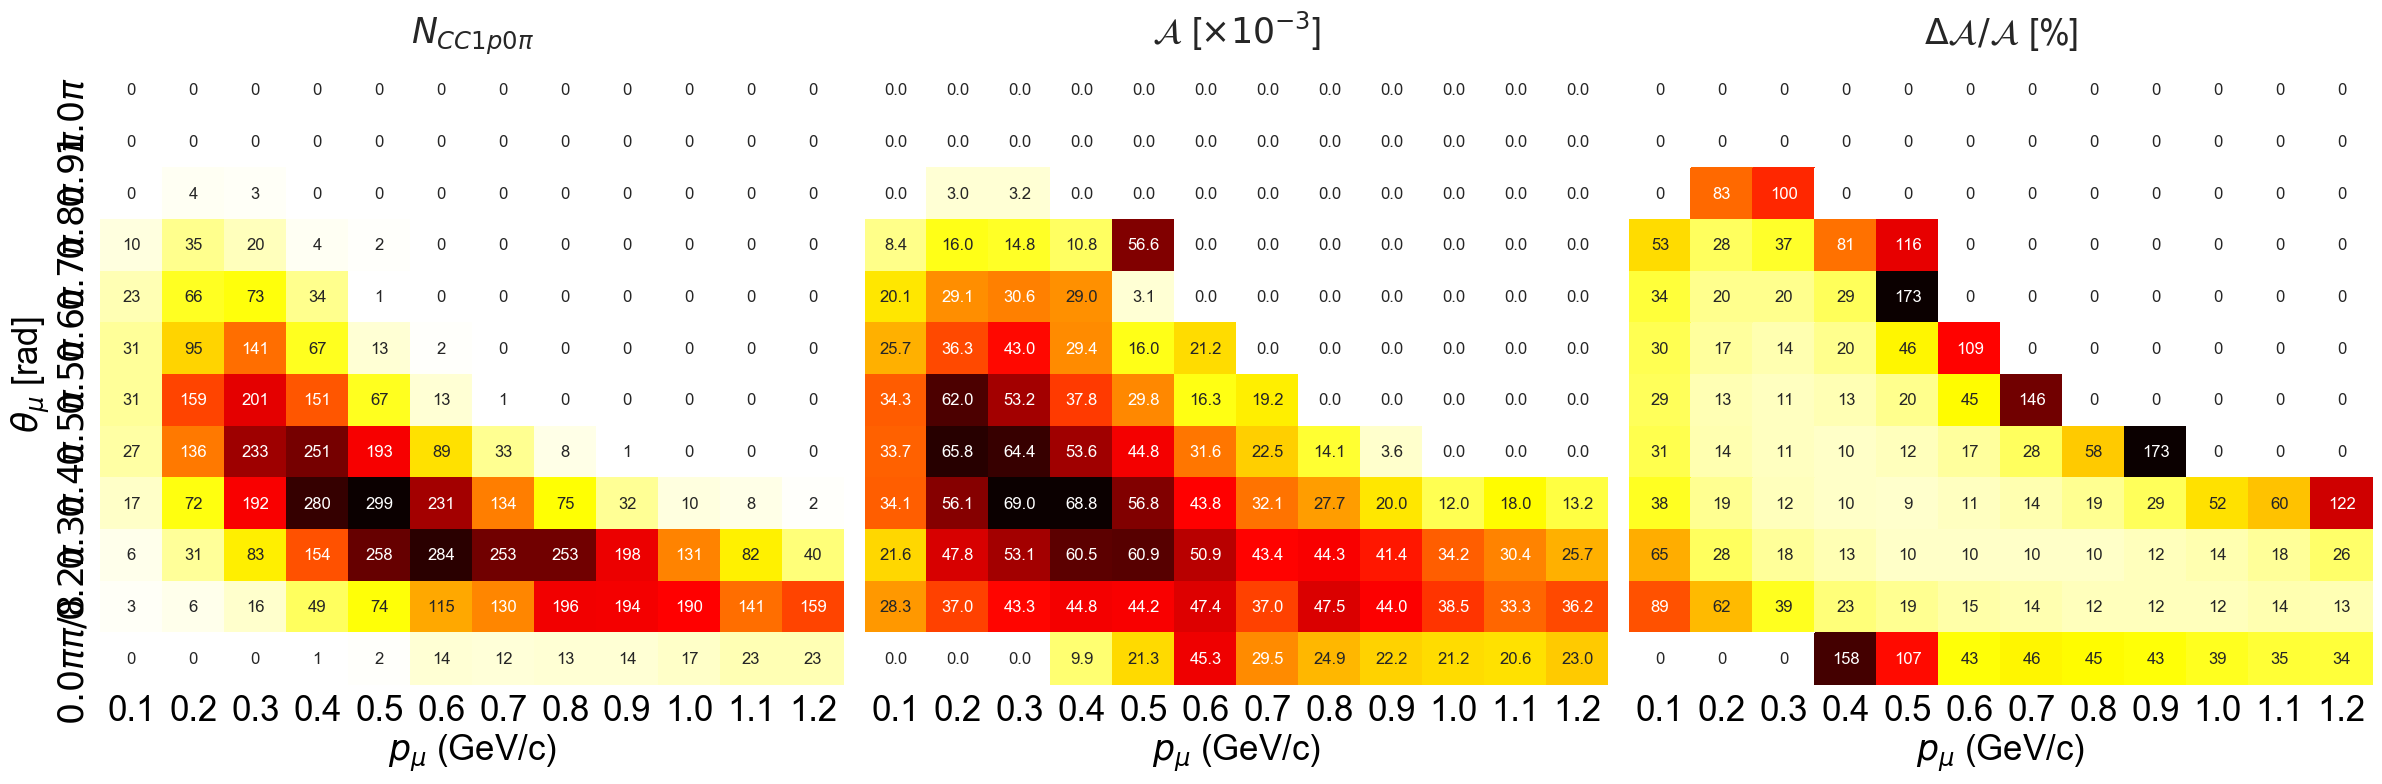

In [29]:
fig = plt.figure(figsize=(24,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'acceptance_full_Pmu_theta.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/acceptance_Pmu_theta.pdf


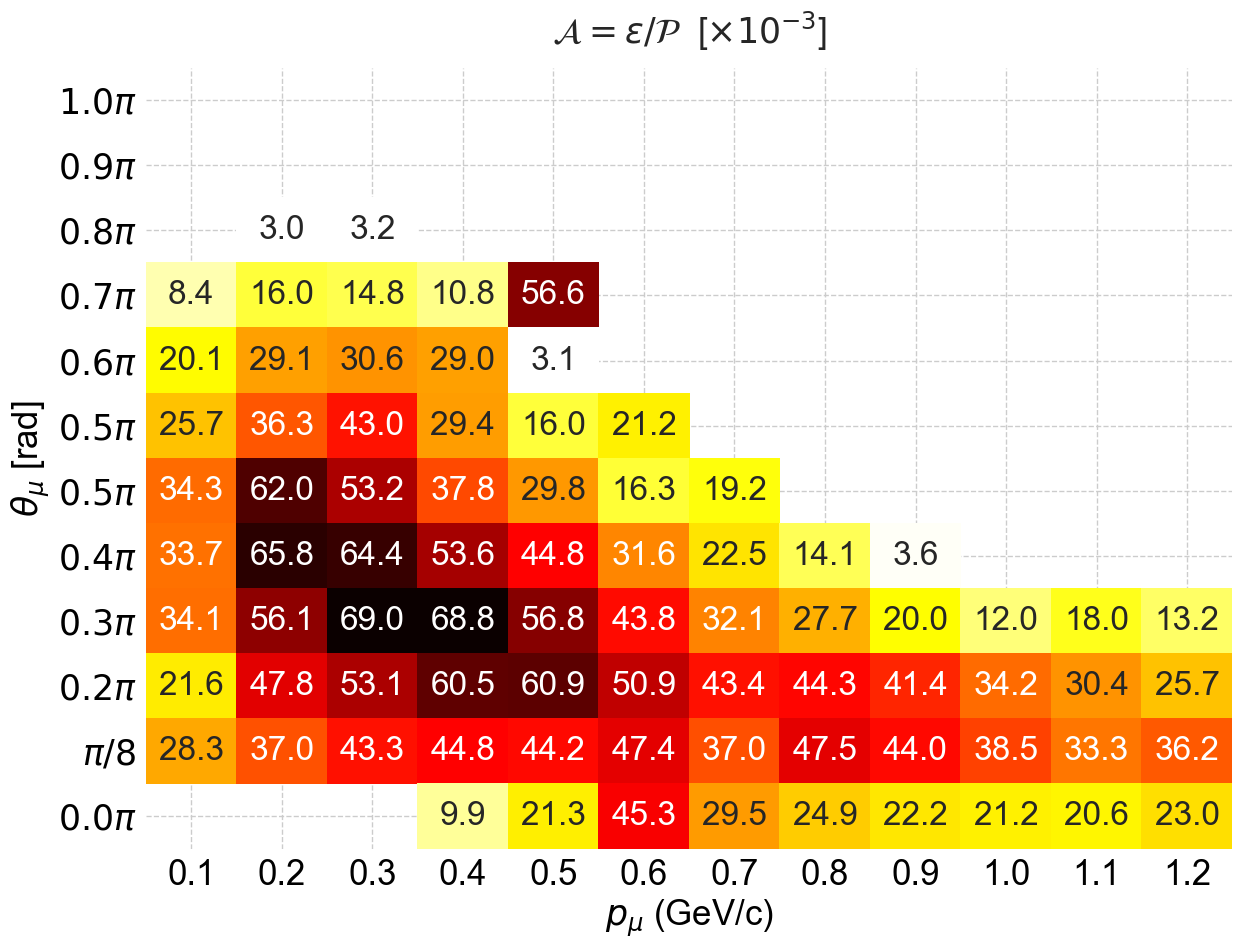

In [37]:
fig = plt.figure(figsize=(12.944,10))
ax = fig.add_subplot(1,1,1)
hacc_draw = 1000.*hacc
hacc_draw[hacc_draw <= 0] = None
sns.set(font_scale=2);
sns.set_style('white');


sns.heatmap(hacc_draw,annot=True,cmap='hot_r',fmt=".1f",vmin=None
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$  [$\times 10^{-3}$]',do_add_grid=True,alpha_grid=1)
ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'acceptance_Pmu_theta.pdf')

## save into a csv file

In [25]:
mapname='Pmu_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_12x12_bins_xbins.csv
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_12x12_bins_ybins.csv
saved acceptance into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_12x12_bins_acceptance.csv
saved acc_err into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_12x12_bins_acc_err.csv


## now run calculation of weights on GENIE samples:
> make && python mac/genie_to_csv.py -mA=0.99 -evf=1

# afro GENIE samples with different $m_A$

In [30]:
sns.set(style='white');
mA_array = [0.6,0.99,1.4]
mA_colors= ['red','blue','yellow','forestgreen','purple','orange','pink','teal']
 # S.Dytman: GENIE assumes mA=0.99 GeV/c2 (Dec-30,2017)

In [79]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'



38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


In [31]:
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

0 CC1p0π events in GENIE samples with mA=0.60
3492 CC1p0π events in GENIE samples with mA=0.99
3867 CC1p0π events in GENIE samples with mA=1.40


# now extract $m_A$ from the $Q^2$ distribution

## The uncertainty of a weighted histogram:
A weighted histogram
$$ h_j = (\sum_{i=1}^{N} w_i)_j$$
and the uncertainty
$$ \Delta h_j 
= \sqrt{Var\left( \sum_i w_i \right)} 
= \sqrt{\sum_i  Var\left( w_i \right)}
= \sqrt{\sum_i w_i^2 Var\left( 1-event \right)} 
= \sqrt{\sum_i w_i^2}$$ 


In [32]:
def add_GENIE(mA=0.99,var='Q2',bins=None,do_add_chi2=False
              ,do_add_weights=True
              ,do_normalize=True,Integral_OnBeam=1
              ,color='black',debug=0):
    hGenie,hGenie_err = np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        genie_in_bin = genie_CC1p0pi[mA][(genie_CC1p0pi[mA][var]>bins[i])&(genie_CC1p0pi[mA][var]<bins[i+1])]
        if do_add_weights: weights_in_bin = genie_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta']
        else: weights_in_bin = np.ones(len(genie_in_bin))
        hGenie[i] = np.sum(weights_in_bin)
        hGenie_err[i] = np.sqrt(np.sum(np.square(weights_in_bin)))      
    if do_normalize:
        hGenie_err = hGenie_err*(Integral_OnBeam/np.float(np.sum(hGenie)))    
        hGenie = hGenie*(Integral_OnBeam/np.float(np.sum(hGenie)))
    if debug:
        print 'hGenie:',hGenie
        print 'hGenie_err:',hGenie_err

    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                         , h1=h_OnBeam , h1err=h_OnBeam_err
                                         , h2=hGenie ,  h2err=hGenie_err, debug=debug )
    plt.step(x=mid , y=hGenie , where='mid' ,color=color
             , label=(('$m_A=%.2f$, '%mA             
                      + (r'$\mu \times p$' if do_add_weights==True else 'no')                      
                      + r' weights' if do_add_chi2==False else ', $\chi^2/ndf=%.1f/%d$'%(chi2,ndf))))

ZeroDivisionError: float division by zero

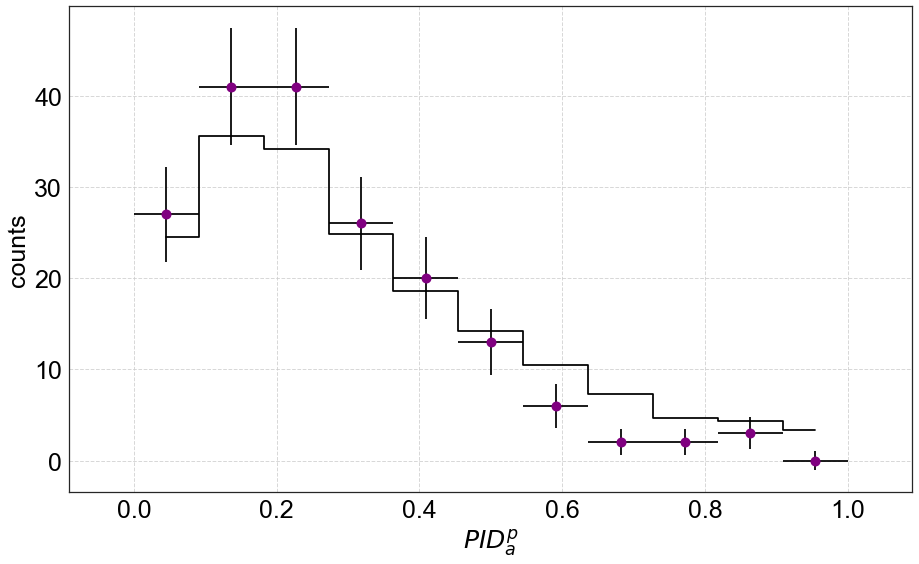

In [33]:
fig=plt.figure(figsize=(12.944,8));ax=fig.add_subplot(1,1,1)
bins=linspace(0,1,12); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(0,1.05)
x_label=r'$Q^2$ (GeV/c)$^2$'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events_tightFV,var='reco_Q2',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(len(selected_events_tightFV))
add_GENIE(mA=0.99,do_add_weights=False,do_normalize=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
for mA,color in zip(mA_array,mA_colors):
    add_GENIE(mA=mA,do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color
              ,debug=0 if mA==0.99 else 0)
    if mA==0.99:
        ylim = (0,40)
        plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights',xlim=(0,1),do_add_legend=True)
# plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)
plt.tight_layout()
save_figure(figures_path+'../Q2/Q2_data_GENIE.pdf')

## now extract $m_A$ from the distribution of $p_p$

In [ ]:
fig=plt.figure(figsize=(12.944,8));ax=fig.add_subplot(1,1,1)
bins=linspace(0.2,1.1,11); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(np.min(bins),np.max(bins))
x_label=r'$p_p$ (GeV/c)'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,var='reco_Pp',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(np.sum(h_OnBeam))
add_GENIE(mA=0.99,var='Pp',do_add_weights=False,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
for mA,color in zip(mA_array,mA_colors):
    add_GENIE(mA=mA,var='Pp',do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color
              ,debug=0 if mA==0.99 else 0)
    if mA==0.99:
        ylim = (0,35)
#         plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights',do_add_legend=True,fontsize=22)
# plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)
plt.tight_layout()
save_figure(figures_path+'../Pp/Pp_data_GENIE.pdf')

## overlay efficiency and purity as a function of $Q^2$

In [34]:
Q2_bins = linspace(0,1,12)
Q2_centers = 0.5*(Q2_bins[1:]+Q2_bins[:-1])
nQ2 = len(Q2_bins)-1
Q2_var = 'truth_Q2'
Q2_ticklabels=["%.1f"%x for x in Q2_centers]
Q2_label=r'$Q^2$ (GeV/c)$^2$'

## efficiency

In [35]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi_tightFV
hgen,_ = np.histogram(generated[Q2_var],bins=Q2_bins)
hacc,_ = np.histogram(accepted[Q2_var],bins=Q2_bins)
heff = np.array([float(hacc[i])/(hgen[i] if hgen[i]>0 else 1) for i in range(len(hgen))])
heff_err =  np.array([heff[i]*np.sqrt( (1./hgen[i] if hgen[i] else 0)
                             + (1./hacc[i] if hacc[i] else 0) ) for i in range(len(hgen))])
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/efficiency_Q2.pdf


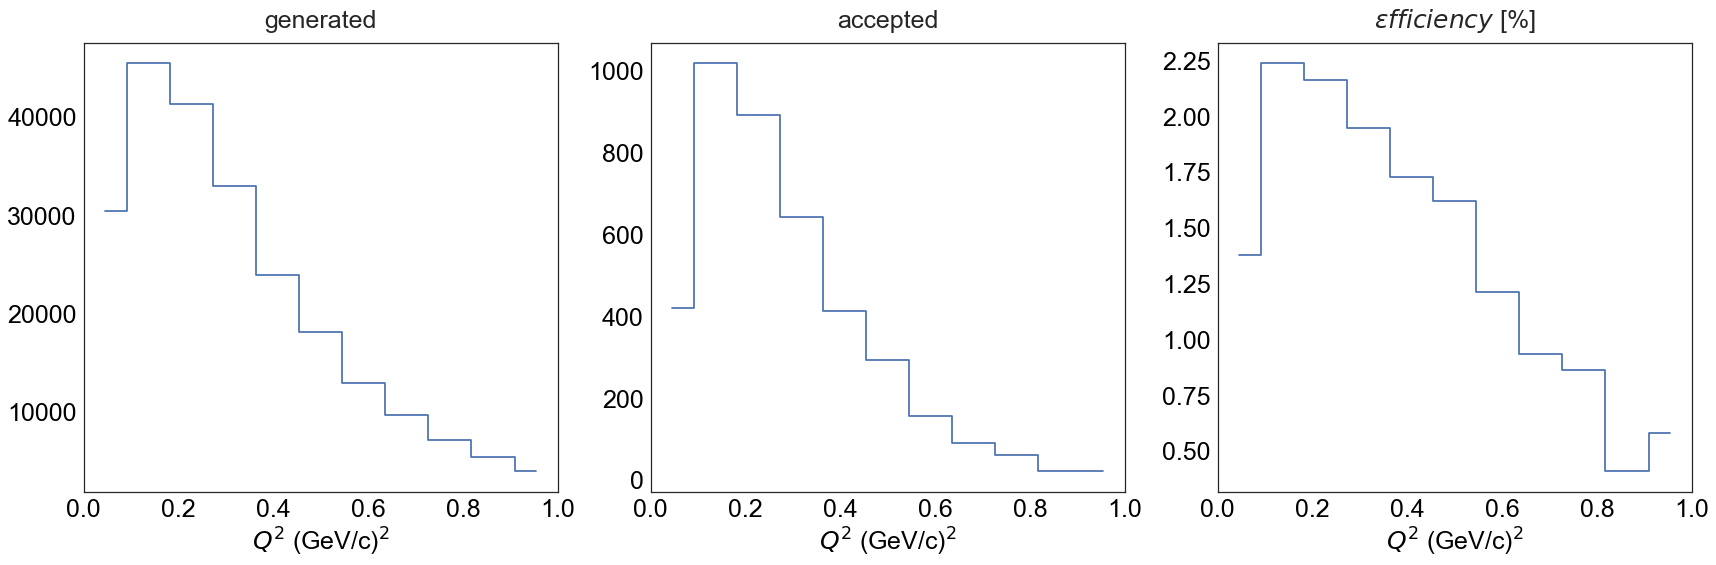

In [36]:
fig = plt.figure(figsize=(24,8))
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    plt.step(Q2_centers,h if i<2 else 100.*h,where='mid')
    set_axes(ax,x_label,'',remove_ticks_y=False if i>0 else False,title=title)
plt.tight_layout()
save_figure(figures_path+'efficiency_Q2.pdf')

## purity

In [37]:
overlay = overlay_tightFV
cc1p0pi = selected_CC1p0pi_tightFV

hall,_ = np.histogram(overlay[Q2_var],bins=Q2_bins)
hcc1p0pi,_ = np.histogram(cc1p0pi[Q2_var],bins=Q2_bins)
hpur = np.array([float(hcc1p0pi[i])/(hall[i] if hall[i]>0 else 1) for i in range(len(hall))])
hpur_err =  np.array([hpur[i]*np.sqrt( (1./hall[i] if hall[i] else 0)
                             + (1./hcc1p0pi[i] if hcc1p0pi[i] else 0) ) for i in range(len(hall))])
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/purity_Q2.pdf


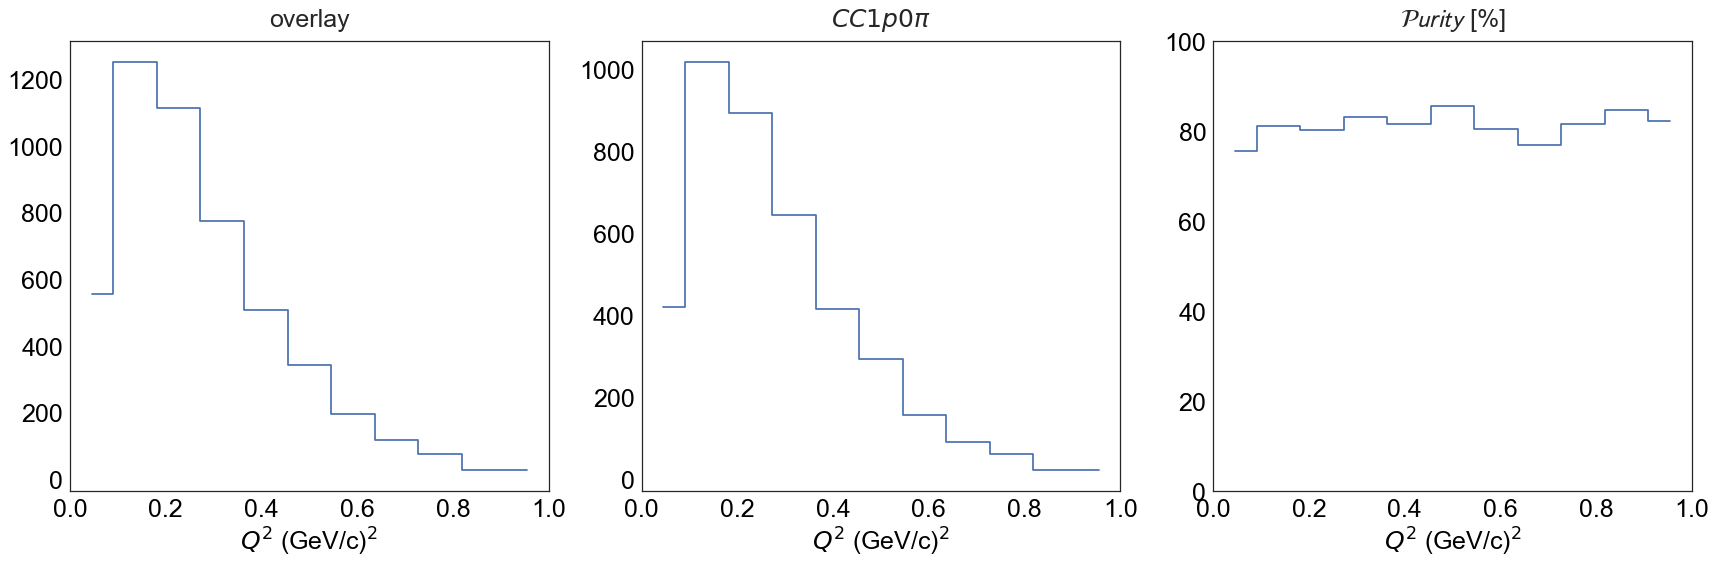

In [38]:
fig = plt.figure(figsize=(24,8))
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    plt.step(Q2_centers,h if i<2 else 100.*h,where='mid')
    set_axes(ax,x_label,'',remove_ticks_y=False if i>0 else False,title=title,ylim=None if i<2 else (0,100))
plt.tight_layout()
save_figure(figures_path+'purity_Q2.pdf')

In [39]:
hacc = np.array([float(heff[i])/(hpur[i] if hpur[i]>0 else 1) for i in range(len(hpur))])
herr =  np.array([hacc[i]*np.sqrt( np.square(heff_err[i]/heff[i] if heff[i] else 0) 
                                            + np.square(hpur_err[i]/hpur[i] if hpur[i] else 0) ) for i in range(len(hacc))])
print 'done'

done


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/acceptance_full_Q2.pdf


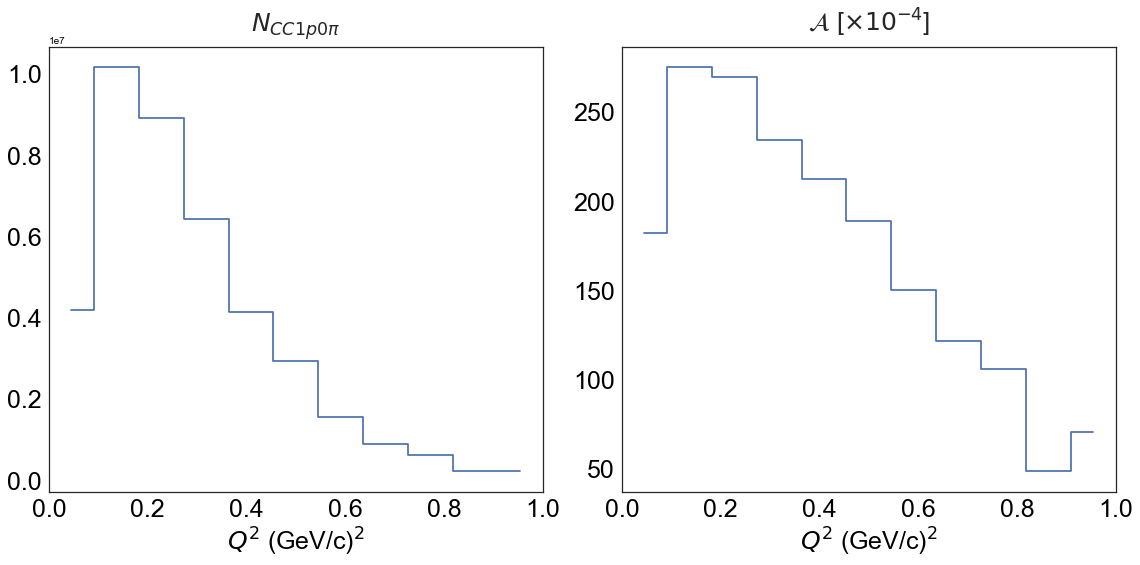

In [40]:
fig = plt.figure(figsize=(16,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-4}$]'])):
    ax = fig.add_subplot(1,2,ih+1)
    plt.step(Q2_centers,h if i<1 else 10000.*h,where='mid')
    set_axes(ax,x_label,'' if ih==0 else '',title=title)    
plt.tight_layout()
save_figure(figures_path+'acceptance_full_Q2.pdf')

## save into a csv file

In [41]:
mapname='Q2'
for array,name in zip([Q2_bins,hacc,herr]
                      ,['bins','acceptance','acc_err']):
    print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%d_bins_%s.csv"%(mapname,nQ2,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

bins : [ 0.          0.09090909  0.18181818  0.27272727  0.36363636  0.45454545
  0.54545455  0.63636364  0.72727273  0.81818182  0.90909091  1.        ]
saved bins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Q2_11_bins_bins.csv
acceptance : [ 0.01821882  0.02754694  0.02696488  0.02342069  0.02123391  0.01890547
  0.01504165  0.01213315  0.01059529  0.00484171  0.00707965]
saved acceptance into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Q2_11_bins_acceptance.csv
acc_err : [ 0.00147972  0.00145366  0.00151616  0.00155961  0.00175629  0.00187204
  0.00201492  0.00213188  0.00226143  0.00174273  0.00248216]
saved acc_err into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Q2_11_bins_acc_err.csv
